In [1]:
import cv2
import pandas as pd
import tensorflow as tf
import numpy as np
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [3]:
x_train = np.load('x_train.npy' ,allow_pickle=True)
x_test = np.load('x_test.npy' ,allow_pickle=True)
y_train = np.load('y_train.npy' ,allow_pickle=True)
y_test = np.load('y_test.npy' ,allow_pickle=True)
x_val = np.load('x_val.npy' ,allow_pickle=True)
y_val = np.load('y_val.npy' ,allow_pickle=True)


In [4]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(32,32,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(32,32,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.Flatten())
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [5]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [7]:
results = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=50,
                    validation_data=(x_val, y_val))

Epoch 1/50
48/48 [==============================] - 3s 14ms/step - loss: 2.1477 - accuracy: 0.2078 - val_loss: 1.7673 - val_accuracy: 0.4180
Epoch 2/50
48/48 [==============================] - 0s 7ms/step - loss: 1.8460 - accuracy: 0.3209 - val_loss: 1.5472 - val_accuracy: 0.4880
Epoch 3/50
48/48 [==============================] - 0s 7ms/step - loss: 1.6755 - accuracy: 0.3910 - val_loss: 1.3592 - val_accuracy: 0.5580
Epoch 4/50
48/48 [==============================] - 0s 7ms/step - loss: 1.5910 - accuracy: 0.4316 - val_loss: 1.2948 - val_accuracy: 0.5660
Epoch 5/50
48/48 [==============================] - 0s 7ms/step - loss: 1.5087 - accuracy: 0.4541 - val_loss: 1.2186 - val_accuracy: 0.6180
Epoch 6/50
48/48 [==============================] - 0s 7ms/step - loss: 1.4223 - accuracy: 0.4870 - val_loss: 1.2148 - val_accuracy: 0.6220
Epoch 7/50
48/48 [==============================] - 0s 7ms/step - loss: 1.3579 - accuracy: 0.5201 - val_loss: 1.1404 - val_accuracy: 0.6620
Epoch 8/50
48/48 [=

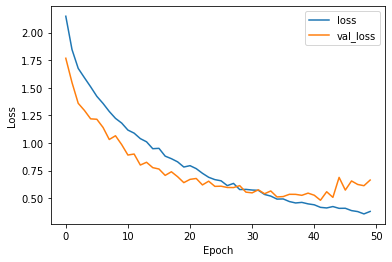

In [8]:
import matplotlib.pyplot as plt

# Plot the the training loss
plt.plot(results.history["loss"], label="loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label="val_loss")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")
# Put legend table
plt.legend()

# Show the plot
plt.show()

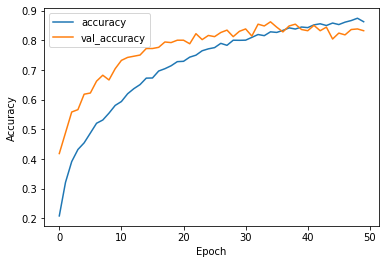

In [9]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"], label="accuracy")

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label="val_accuracy")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Put legend table
plt.legend()

# Show the plot
plt.show()

In [10]:
##Performance Evaulate
model.evaluate(x_test, y_test)

69/69 [==============================] - 1s 4ms/step - loss: 0.6064 - accuracy: 0.8470


[0.6064077615737915, 0.8469995260238647]

In [11]:
# Make prediction on the reshaped sample
prediction_result = model.predict(x_test[789].reshape(1,32,32,1))

# Print the prediction result
prediction_result

1/1 [==============================] - 0s 381ms/step


array([[1.07943436e-07, 9.98414278e-01, 1.67641090e-07, 1.16955025e-05,
        5.11852886e-05, 1.96515113e-12, 1.48594002e-11, 4.51975870e-12,
        1.77541892e-06, 1.52077968e-03]], dtype=float32)

In [12]:
# Find the predicted class
predicted_class=prediction_result.argmax()
# Find the prediction probability
predicted_probability = prediction_result.max()

In [13]:
print(f"This image belongs to class {predicted_class} with {predicted_probability} probability %")

This image belongs to class 1 with 0.9984142780303955 probability %
